In this notebook, using the [Decision Tree Classifier](https://www.datacamp.com/community/tutorials/decision-tree-classification-python) implemented in scikit-learn, we will learn which features of mushrooms spell certain death and which are most palatable. The dataset is available [here](https://www.kaggle.com/uciml/mushroom-classification).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import plot_confusion_matrix

We load the data into a Pandas dataframe and check a random selection of rows to get a feeling.

In [2]:
df = pd.read_csv('Mushrooms.csv')
df.sample(5)

,edibility,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
4321,poisonous,flat,fibrous,gray,no,foul,free,close,broad,pink,...,silky,silky,green,buff,white,one,large,chocolate,solitary,grasses
4412,poisonous,flat,smooth,gray,no,foul,free,close,broad,gray,...,silky,silky,green,brown,white,one,large,chocolate,several,wood
7474,poisonous,knobbed,smooth,red,no,spicy,free,close,narrow,buff,...,silky,smooth,green,green,white,one,evanescent,white,several,leaves
7440,edible,knobbed,scaly,brown,no,none,attached,close,broad,brown,...,smooth,smooth,pink,pink,orange,one,pendant,orange,several,leaves
4651,poisonous,flat,fibrous,gray,no,foul,free,close,broad,gray,...,silky,silky,buff,brown,white,one,large,chocolate,solitary,grasses


Many machine learning algorithms cannot work with categorical data directly, hence categories must be converted into numbers (**one-hot encoding**). This can be done in Pandas with ```get_dummies()```.

In [3]:
df_e = pd.get_dummies(df)
df_e.sample(5)

,edibility_edible,edibility_poisonous,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_knobbed,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_wood
7418,1,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5615,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
7872,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
639,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2035,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


We wish to predict the **edibility** of a mushroom based on all the available features of the dataset.

In [4]:
x = df_e.loc[:,'cap_shape_bell':]       # features
y = df_e.loc[:,'edibility_edible']      # target

Before setting up and **training** the model, we split the dataset in order to set aside some data for **validating** and **testing** our classifier.

In [5]:
# train + test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=0)

In [6]:
# (train+validation) + test
x_train_train, x_train_val, y_train_train, y_train_val = train_test_split(x_train,y_train,test_size=0.15,random_state=0)

Now we define a model that contains at least 100 observations in the final nodes (leaves), then we train it and evaluate its $R^2$ score for both the training and the validation sets.

In [7]:
clf = DecisionTreeClassifier(random_state=0, min_samples_leaf=100)

In [8]:
clf.fit(x_train_train,y_train_train)

DecisionTreeClassifier(min_samples_leaf=100, random_state=0)

In [9]:
clf.score(x_train_train,y_train_train), clf.score(x_train_val,y_train_val)

(0.9717157948543194, 0.9565637065637066)

Here we visualise the decision tree.

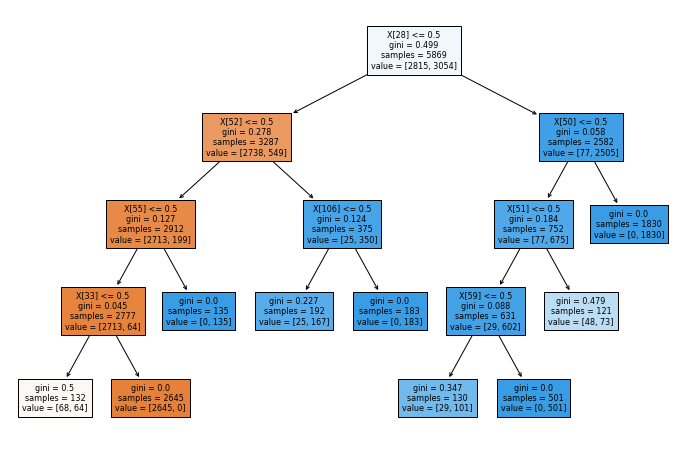

In [10]:
fig, ax = plt.subplots(figsize=(12,8))

plot_tree(clf,fontsize=8,filled='True',ax=ax);

But we can do much better, defining a "bigger" tree – with no (minimum) limit on samples in the leaves.

In [11]:
clf_2 = DecisionTreeClassifier(random_state=0, min_samples_leaf=1)

Again, we train the model, evaluate its $R^2$ scores and visualise the decision tree.

In [12]:
clf_2.fit(x_train_train,y_train_train)

DecisionTreeClassifier(random_state=0)

In [13]:
clf_2.score(x_train_train,y_train_train), clf_2.score(x_train_val,y_train_val)

(1.0, 1.0)

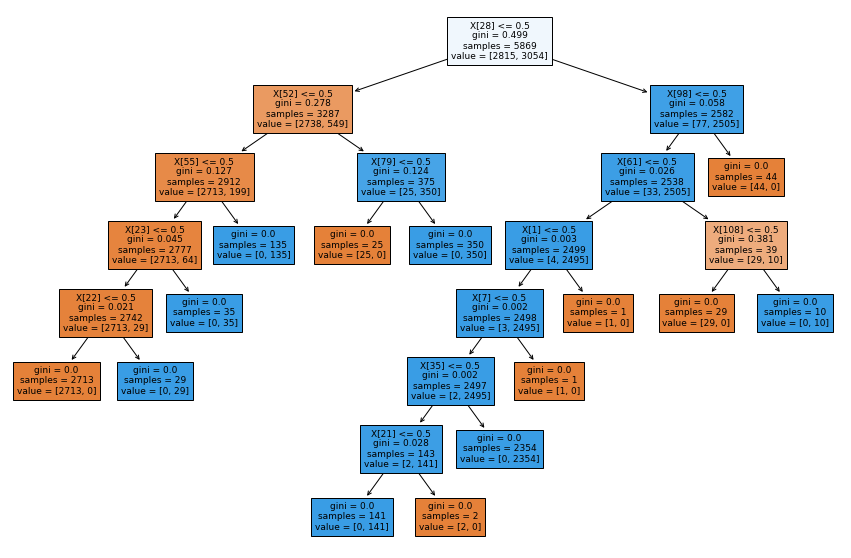

In [14]:
fig, ax = plt.subplots(figsize=(15,10))

plot_tree(clf_2,fontsize=9,filled=True,ax=ax);

We wish now to compare the two models by looking at their **Mean Absolute Error** (MAE).

In [15]:
# test-set predictions of the "small" and "big" trees
y_pred = clf.predict(x_test)
y_pred_2 = clf_2.predict(x_test)

In [16]:
MAE(y_pred,y_test), MAE(y_pred_2,y_test)

(4.6177194421657095, 0.0)

One can also look at the **confusion matrices** of the classifiers.

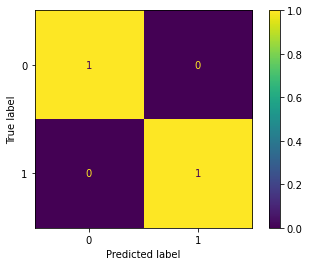

In [17]:
plot_confusion_matrix(clf,x_test,y_pred,normalize='true');

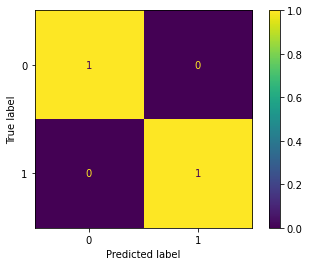

In [18]:
plot_confusion_matrix(clf_2,x_test,y_pred_2,normalize='true');

As a *benchmark*, we compare the decision tree with one of the archetypes of linear classification, *i.e.* the **linear regression**.

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=5000,verbose=1)

We now fit and evaluate the model, keeping in mind that ```LogisticRegression()``` instantiates a linear model, hence splitting the dataset is not necessary.

In [20]:
lr.fit(x,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(max_iter=5000, verbose=1)

In [21]:
lr.score(x,y)

1.0

What we find is that these data are **linearly separable**.

Also note the **perfect** score: the reason behind it may be that there are several features in the dataset that have an [imbalanced distribution](https://arxiv.org/ftp/arxiv/papers/1305/1305.1707.pdf) (skewed) on the target; hence accuracy for the classifier can be very high, although it does not perform well.

TO BE DONE: we should be able to see this by running a **feature-importance test**.